In [24]:
import MySQLdb as mysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,spearmanr
%matplotlib inline

In [25]:
con = mysql.connect("chgr2.accre.vanderbilt.edu","sivleyrm","global-trifecta","ripleysK_results")

In [26]:
sql = """SELECT a.unp,a.pdbid,a.chain,nresidues,nsnvs,t,k,p,z,q,id1
            FROM pdb_exac_missense_univariate a 
            left join pdbmap_supp.enzyme b
            on a.unp=b.unp"""
df = pd.read_sql(sql,con)
df["id1"] = df["id1"].astype(float)
print "Analyzing enzyme bias for %d ExAC results."%(len(df))
print "Not Enzyme: %4d"%(df["id1"].isnull()).sum()
print "Enzyme:     %4d"%(~df["id1"].isnull()).sum()

Analyzing enzyme bias for 4711 ExAC results.
Not Enzyme: 3021
Enzyme:     1690


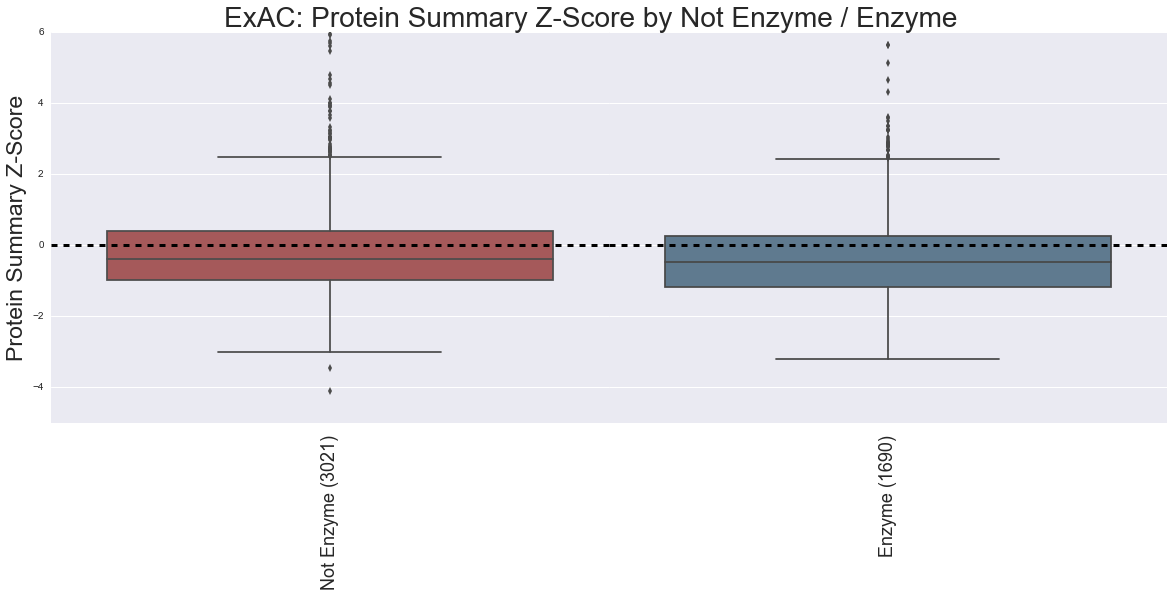


~3 outliers not shown.
ANOVA: F=13.4955; p=0.000242


In [27]:
# Setup the plot
fig,ax = plt.subplots(1,2,figsize=(20,7),sharey=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=2, desat=.5))

# Not enzyme
ne = df.ix[df["id1"].isnull(),"z"]
sns.boxplot(ne,color=pal[0],ax=ax[0],orient='vertical')
ax[0].set_xlabel("Not Enzyme (%d)"%len(ne),fontsize=18,rotation='vertical')
ax[0].set_ylabel("")
ax[0].set_ylim([-5,6])
# Enzyme
e  = df.ix[~df["id1"].isnull(),"z"]
sns.boxplot(e,color=pal[1],ax=ax[1],orient='vertical')
ax[1].set_xlabel("Enzyme (%d)"%len(e),fontsize=18,rotation='vertical')
ax[1].set_ylabel("")
ax[1].set_ylim([-5,6])
    
plt.rcParams['xtick.labelsize'] = 20
ax[0].set_ylabel("Protein Summary Z-Score",fontsize=23)
for x in ax:
    x.axhline(y=0,c='k',ls='dashed',lw=3)
plt.suptitle("ExAC: Protein Summary Z-Score by Not Enzyme / Enzyme",fontsize=28,y=0.95)
plt.show()

print "\n~3 outliers not shown."
print "ANOVA: F=%g; p=%.3g"%f_oneway(ne.dropna(),e.dropna())

In [28]:
sql = """SELECT a.unp,a.pdbid,a.chain,nresidues,nsnvs,t,k,p,z,q,id1
            FROM pdb_cosmic_missense_univariate a 
            left join pdbmap_supp.enzyme b
            on a.unp=b.unp"""
df = pd.read_sql(sql,con)
df["id1"] = df["id1"].astype(float)
print "Analyzing enzyme bias for %d COSMIC results."%(len(df))

Analyzing enzyme bias for 4747 COSMIC results.


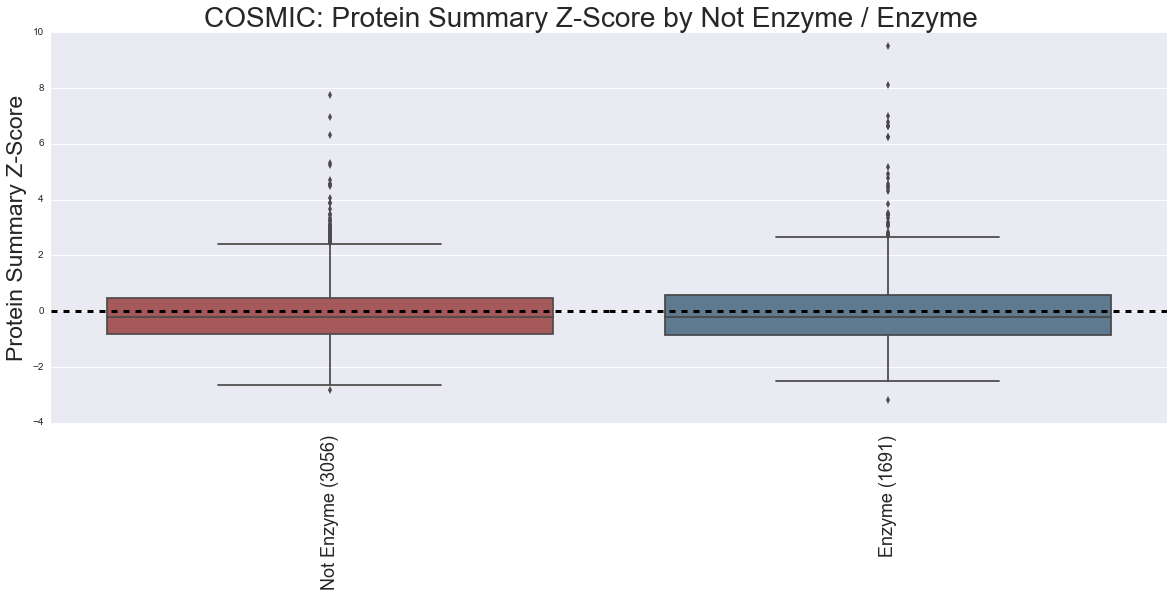


~3 outliers not shown.
ANOVA: F=1.57663; p=0.209


In [29]:
# Setup the plot
fig,ax = plt.subplots(1,2,figsize=(20,7),sharey=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=2, desat=.5))

# Not enzyme
ne = df.ix[df["id1"].isnull(),"z"]
sns.boxplot(ne,color=pal[0],ax=ax[0],orient='vertical')
ax[0].set_xlabel("Not Enzyme (%d)"%len(ne),fontsize=18,rotation='vertical')
ax[0].set_ylabel("")
# ax[0].set_ylim([-5,6])
# Enzyme
e  = df.ix[~df["id1"].isnull(),"z"]
sns.boxplot(e,color=pal[1],ax=ax[1],orient='vertical')
ax[1].set_xlabel("Enzyme (%d)"%len(e),fontsize=18,rotation='vertical')
ax[1].set_ylabel("")
# ax[1].set_ylim([-5,6])
    
plt.rcParams['xtick.labelsize'] = 20
ax[0].set_ylabel("Protein Summary Z-Score",fontsize=23)
for x in ax:
    x.axhline(y=0,c='k',ls='dashed',lw=3)
plt.suptitle("COSMIC: Protein Summary Z-Score by Not Enzyme / Enzyme",fontsize=28,y=0.95)
plt.show()

print "\n~3 outliers not shown."
print "ANOVA: F=%g; p=%.3g"%f_oneway(ne.dropna(),e.dropna())

In [30]:
sql = """SELECT a.unp,a.pdbid,a.chain,nresidues,nsnvs,t,k,p,z,q,id1
            FROM pdb_clinvar_missense_univariate a 
            left join pdbmap_supp.enzyme b
            on a.unp=b.unp"""
df = pd.read_sql(sql,con)
df["id1"] = df["id1"].astype(float)
print "Analyzing enzyme bias for %d ClinVar results."%(len(df))

Analyzing enzyme bias for 475 ClinVar results.


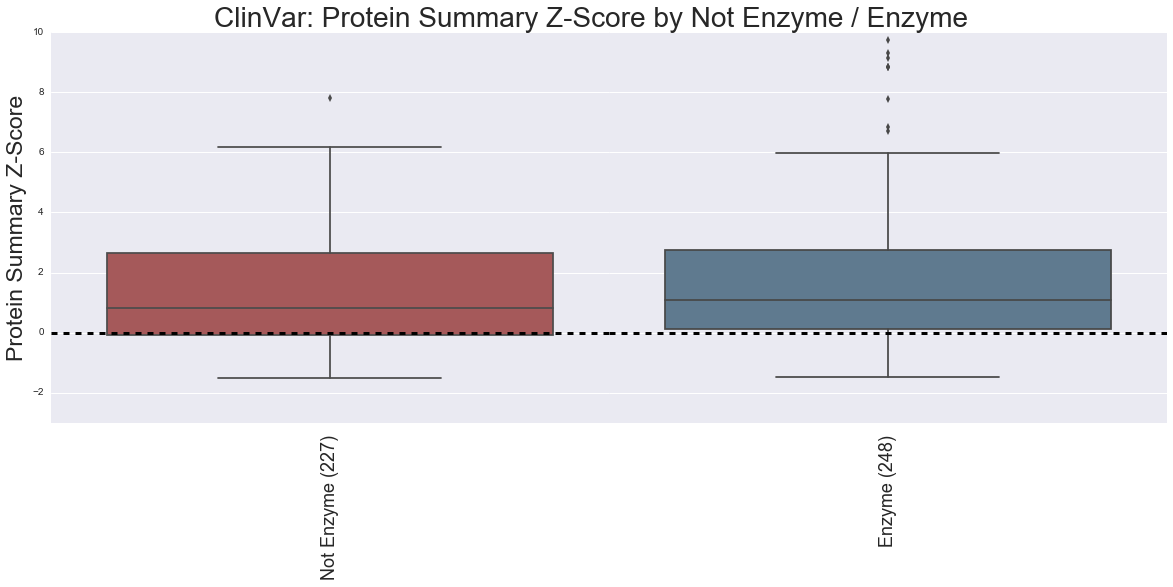


~3 outliers not shown.
ANOVA: F=2.54133; p=0.112


In [32]:
# Setup the plot
fig,ax = plt.subplots(1,2,figsize=(20,7),sharey=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=2, desat=.5))

# Not enzyme
ne = df.ix[df["id1"].isnull(),"z"]
sns.boxplot(ne,color=pal[0],ax=ax[0],orient='vertical')
ax[0].set_xlabel("Not Enzyme (%d)"%len(ne),fontsize=18,rotation='vertical')
ax[0].set_ylabel("")
ax[0].set_ylim([-3,10])
# Enzyme
e  = df.ix[~df["id1"].isnull(),"z"]
sns.boxplot(e,color=pal[1],ax=ax[1],orient='vertical')
ax[1].set_xlabel("Enzyme (%d)"%len(e),fontsize=18,rotation='vertical')
ax[1].set_ylabel("")
ax[1].set_ylim([-3,10])
    
plt.rcParams['xtick.labelsize'] = 20
ax[0].set_ylabel("Protein Summary Z-Score",fontsize=23)
for x in ax:
    x.axhline(y=0,c='k',ls='dashed',lw=3)
plt.suptitle("ClinVar: Protein Summary Z-Score by Not Enzyme / Enzyme",fontsize=28,y=0.95)
plt.show()

print "\n~3 outliers not shown."
print "ANOVA: F=%g; p=%.3g"%f_oneway(ne.dropna(),e.dropna())